In [ ]:
import pandas as pd
df = pd.read_csv('taskk4_csv.csv')
df

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,30-01-2023 11:00
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,02-01-2023 22:45
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,18-01-2023 11:25
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,10-04-2023 22:06
4,5,carlwarren,Involve sense former often approach government...,27,80,24-01-2023 07:12
...,...,...,...,...,...,...
9995,9996,ntate,Agree reflect military box ability ever hold. ...,81,86,15-01-2023 11:46
9996,9997,garrisonjoshua,Born which push still. Degree sometimes contro...,73,100,06-05-2023 00:46
9997,9998,adriennejackson,You day agent likely region. Teacher data mess...,10,62,27-02-2023 14:55
9998,9999,kcarlson,Guess without successful save. Particular natu...,21,60,09-01-2023 16:09


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime

In [ ]:
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()
sia


In [ ]:
# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Apply the function to the DataFrame to get sentiment scores for each text
df['Sentiment_Score'] = df['Text'].apply(get_sentiment_score)



In [ ]:
# Preprocess text
df['Text'] = df['Text'].apply(lambda x: x.lower()) # Convert to lowercase
df['Sentiment_Score'] = df['Text'].apply(get_sentiment_score)

In [ ]:
# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


<ipython-input-9-f3d20a71a869>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [ ]:
# Aggregate sentiment scores over time (daily)
df['Date'] = df['Timestamp'].dt.date
sentiment_over_time = df.groupby('Date')['Sentiment_Score'].mean()


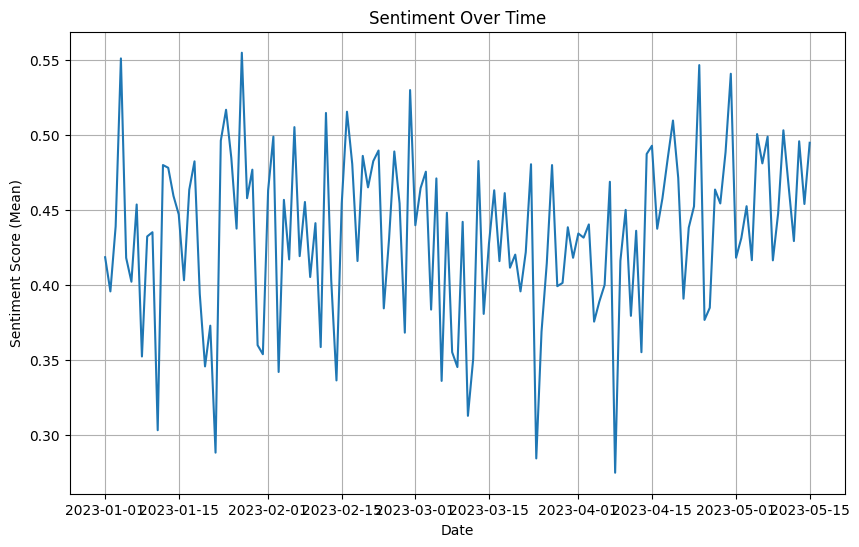

In [ ]:
# Visualize sentiment patterns
plt.figure(figsize=(10, 6))
sentiment_over_time.plot()
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score (Mean)')
plt.grid(True)
plt.show()